In [1]:
import subprocess
import time
import os

import matplotlib.pyplot as plt

In [10]:
def run_matrix_multiplication(exe_path, size, path_a, path_b, path_c, thread):
    mpiexec_path = "C:\\Program Files\\Microsoft MPI\\Bin\\mpiexec.exe"
    args = [mpiexec_path, "-n", str(thread), exe_path, str(size), path_a, path_b, path_c]
    start_time = time.perf_counter()
    result = subprocess.run(args, capture_output=True, text=True)
    end_time = time.perf_counter()
    return end_time - start_time

In [12]:
times_1 = []
times_2 = []
times_3 = []
times_4 = []
sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
threads = [1, 4, 8]
for j in threads:
    curr_times = []
    for i in sizes:
            path_a = os.path.join("..", "gen_matrix", str(i), "a_matrix.txt")
            path_b = os.path.join("..", "gen_matrix", str(i), "b_matrix.txt")
            path_c = os.path.join("results", str(j), f"{i}.txt")
            exe_path = os.path.join("out", "build", "x64-Debug", "mpi_program.exe")
            elapsed = run_matrix_multiplication(exe_path, i, path_a, path_b, path_c, j)
            curr_times.append(elapsed)
    if j == 1:
        times_1 = curr_times
    elif j == 4:
        times_4 = curr_times
    elif j == 8:
        times_8 = curr_times

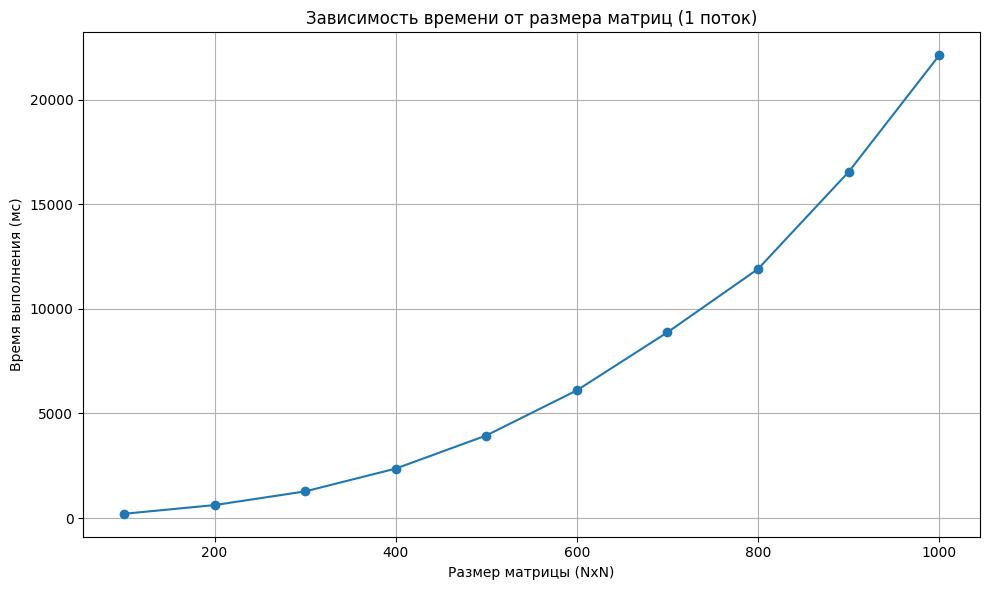

In [13]:
times_ms = [t * 1000 for t in times_1]

plt.figure(figsize=(10, 6))
plt.plot(sizes, times_ms, marker='o')
plt.xlabel("Размер матрицы (NxN)")
plt.ylabel("Время выполнения (мс)")
plt.title("Зависимость времени от размера матриц (1 поток)")
plt.grid(True)
plt.tight_layout()
plt.show()

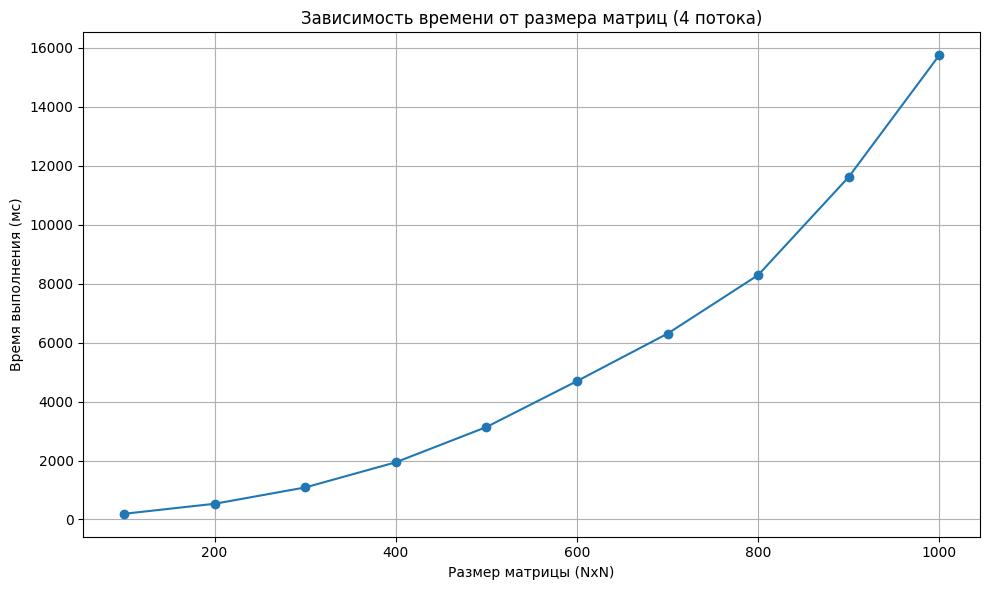

In [14]:
times_ms = [t * 1000 for t in times_4]

plt.figure(figsize=(10, 6))
plt.plot(sizes, times_ms, marker='o')
plt.xlabel("Размер матрицы (NxN)")
plt.ylabel("Время выполнения (мс)")
plt.title("Зависимость времени от размера матриц (4 потока)")
plt.grid(True)
plt.tight_layout()
plt.show()

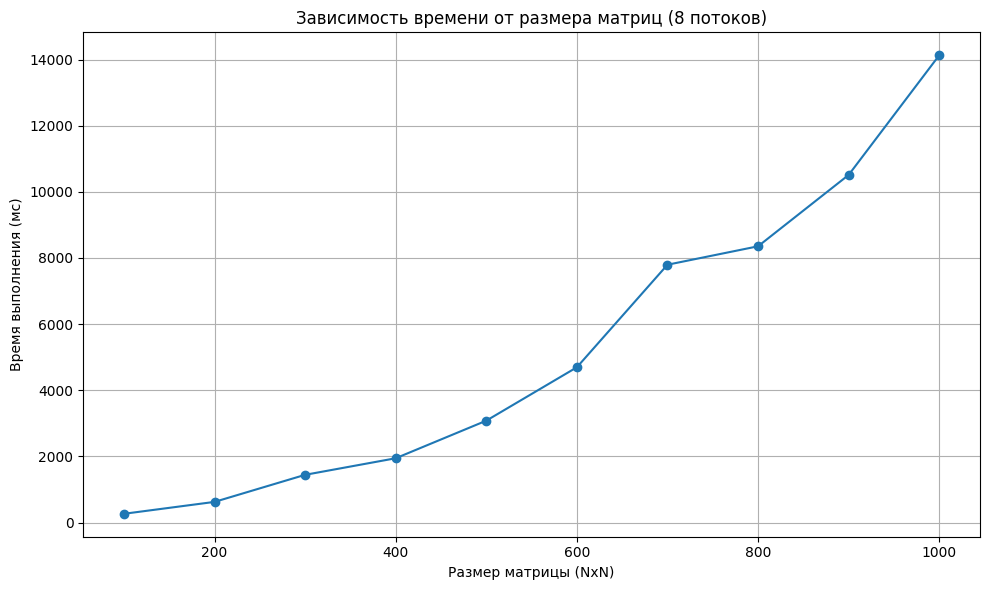

In [15]:
times_ms = [t * 1000 for t in times_8]

plt.figure(figsize=(10, 6))
plt.plot(sizes, times_ms, marker='o')
plt.xlabel("Размер матрицы (NxN)")
plt.ylabel("Время выполнения (мс)")
plt.title("Зависимость времени от размера матриц (8 потоков)")
plt.grid(True)
plt.tight_layout()
plt.show()

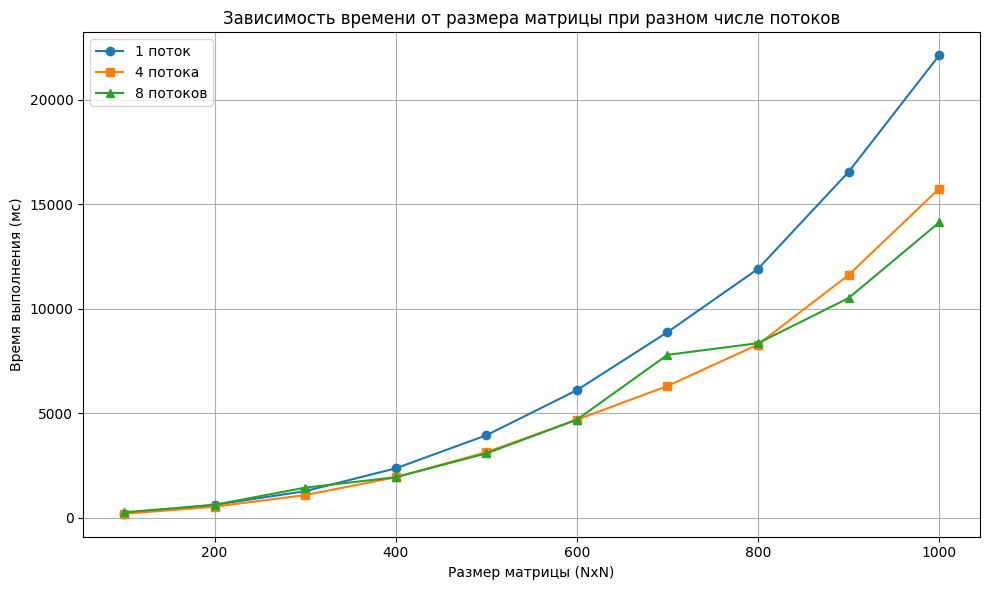

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(sizes, [t * 1000 for t in times_1], marker='o', label="1 поток")
plt.plot(sizes, [t * 1000 for t in times_4], marker='s', label="4 потока")
plt.plot(sizes, [t * 1000 for t in times_8], marker='^', label="8 потоков")

plt.xlabel("Размер матрицы (NxN)")
plt.ylabel("Время выполнения (мс)")
plt.title("Зависимость времени от размера матрицы при разном числе потоков")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()